In [1]:
!git clone https://github.com/yunkio/2025_LGE_0424.git #코랩 사용

fatal: destination path '2025_LGE_0424' already exists and is not an empty directory.


# [Clustering]
# K-Means Clustering / Hierachical Clustering / Density-based Clustering
## [Density-based Clustering: DBSCAN]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

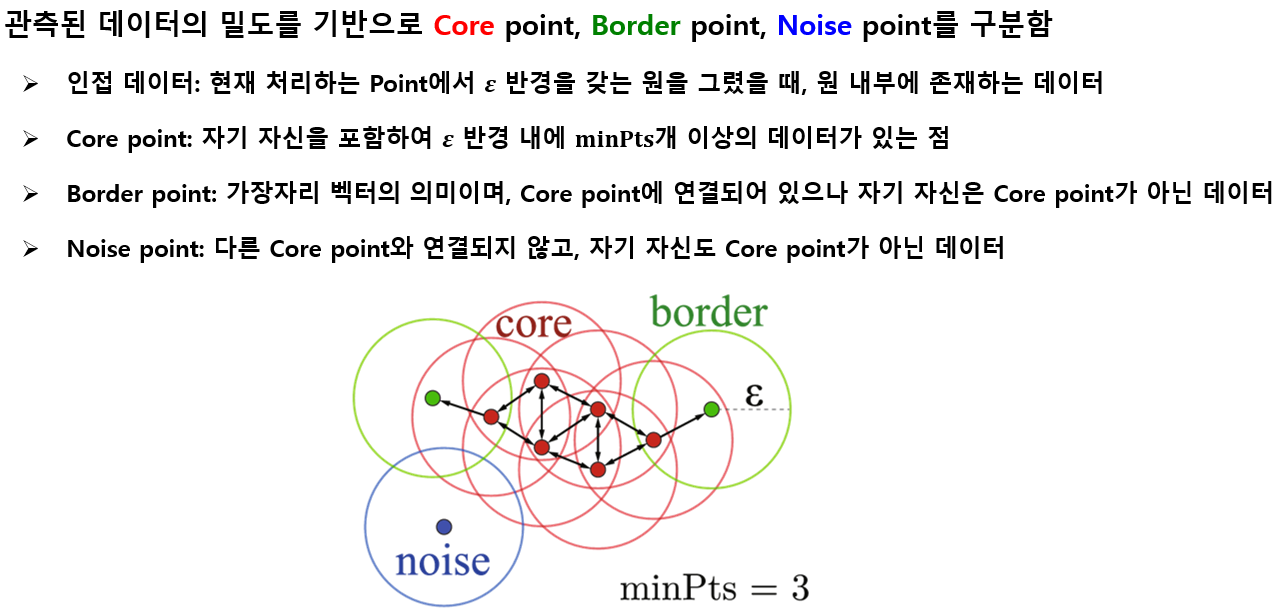

## 1. 모듈 불러오기

In [2]:
''' 기본 모듈 및 시각화 모듈 '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

''' 데이터 생성 모듈 '''
from sklearn.datasets import make_moons

''' Clustering 모듈 '''
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

import warnings
warnings.filterwarnings("ignore")

## 2. 분석데이터: Toy Example Data Set (make_moons dataset in sklearn)

In [3]:
# Data load
X, y = make_moons(n_samples=500, noise=0.1, random_state=2024)

df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.976985,0.120925
1,0.298908,-0.170080
0,0.666939,0.543317
0,0.174921,1.103384
0,-0.981583,0.147719


### Visualize the data

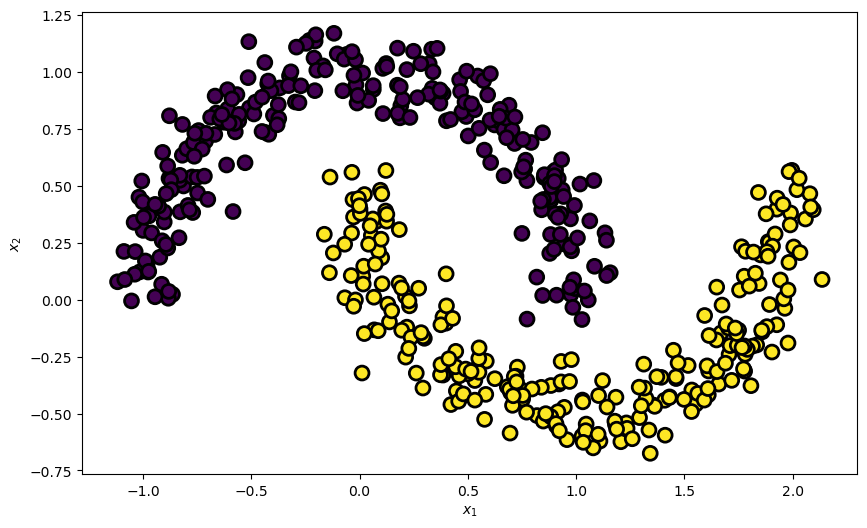

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## 3. DBSCAN

In [5]:
# min_sample: deault= 5 
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

### Visualizing DBSCAN (default setting)

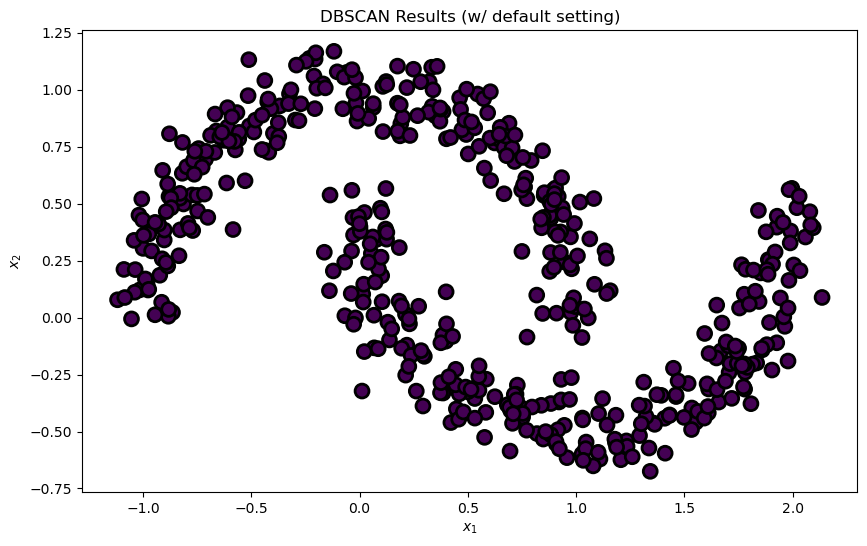

In [6]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1],  marker='o', c=dbscan_cluster1.labels_, s=100, edgecolor="k", linewidth=2)

plt.title("DBSCAN Results (w/ default setting)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [7]:
dbscan_cluster1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Number of Clusters
labels = dbscan_cluster1.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
# 시각화를 하지 못할 경우 성능 평가 지표를 이용함
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


### Visualizing DBSCAN (parameter tuning)

In [9]:
# eps: Cluster 간의 최대 거리 (default=0.5)
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.1, min_samples=8)

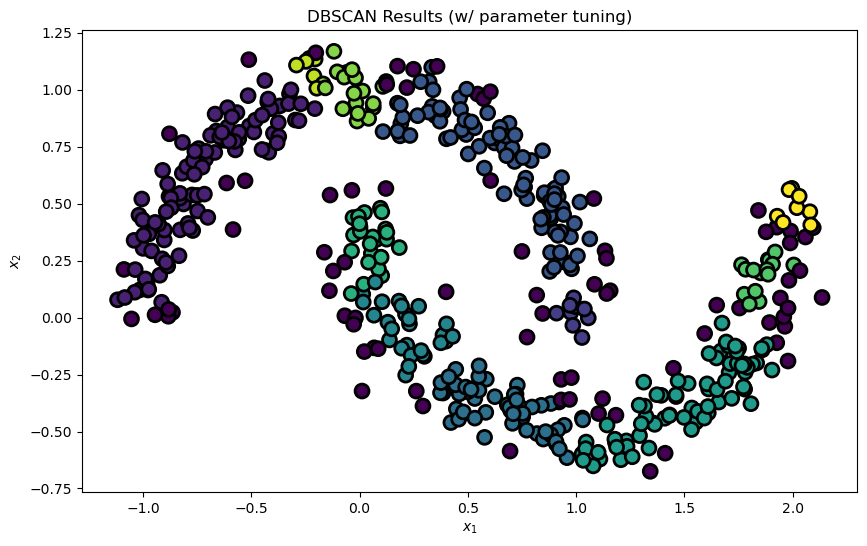

In [10]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1],  marker='o', c=dbscan_cluster.labels_, s=100, edgecolor="k", linewidth=2)  

plt.title("DBSCAN Results (w/ parameter tuning)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [11]:
# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 11
Estimated no. of noise points: 81
v_measure = 0.4087958639642211


## 4. Find the Optimal value of Epsilon

- elbow point detection method to arrive at a suitable value of epsilon
- MinPts 값을 선정하기 위해, average k-distance graph를 구성하여 가장 경사도가 높은 지점(elbow point)을 optimal value로 선정

In [12]:
# 각 점에서의 k-nearest neighbors 계산
# package load
from sklearn.neighbors import NearestNeighbors

# k-nearest neighbors define & train
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

### Distance 계산 및 오름차순 정렬

In [13]:
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

### 시각화

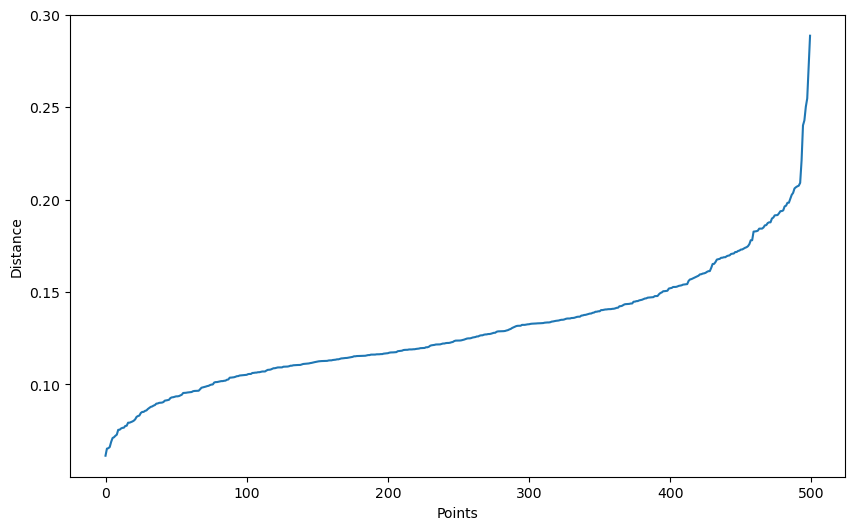

In [14]:
# visualize the distances
fig = plt.figure(figsize=(10, 6))

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.show()

In [15]:
# !pip install kneed

In [16]:
# package load
from kneed import KneeLocator

# Knee point location 찾기
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

<Figure size 1000x600 with 0 Axes>

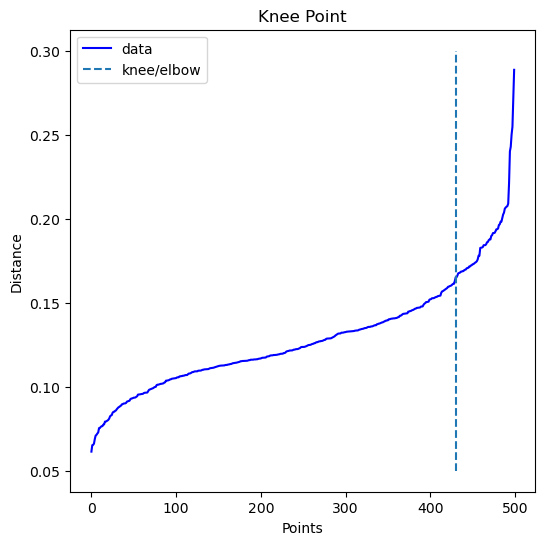

knee point index:  430
distance of knee point 0.16515140583170687


In [17]:
# visualize the knee point
fig = plt.figure(figsize=(10, 6))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

plt.show()

print("knee point index: ", knee.knee)
print("distance of knee point", distances[knee.knee])

## 4.1 Applying DBSCAN with optimal value of Epsilon (Epsilon = 0.165)

### DBSCAN model define & train

In [18]:
dbscan_cluster = DBSCAN(eps=0.165, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.165, min_samples=8)

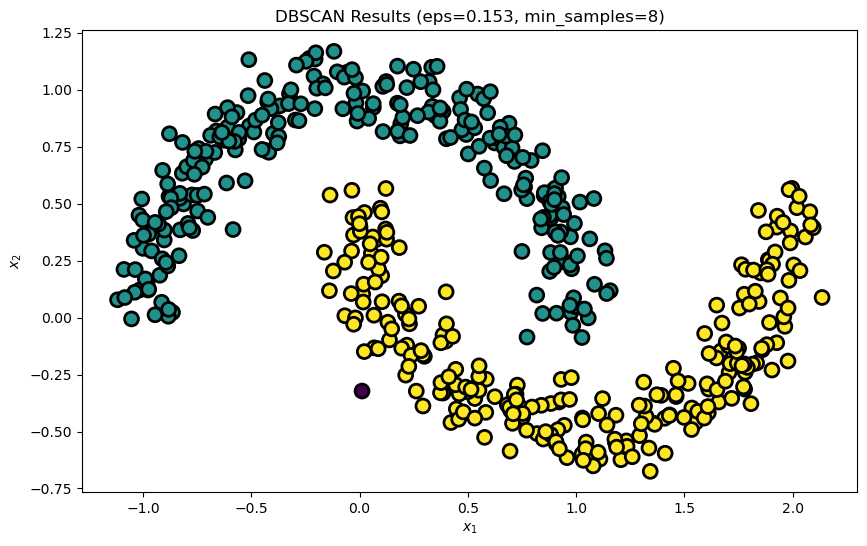

In [19]:
# Visualizing DBSCAN
fig = plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=dbscan_cluster.labels_, s=100, edgecolor="k", linewidth=2)

plt.title("DBSCAN Results (eps=0.153, min_samples=8)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [20]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 1
v_measure = 0.9906820507306495


## 4.1 Applying DBSCAN with z-score

In [21]:
df = pd.read_csv("/content/2025_LGE_0424/data/insurance.csv")
# df = pd.read_csv("./data/insurance.csv") # 로컬

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 데이터 분포 확인 (반응변수: charges) 

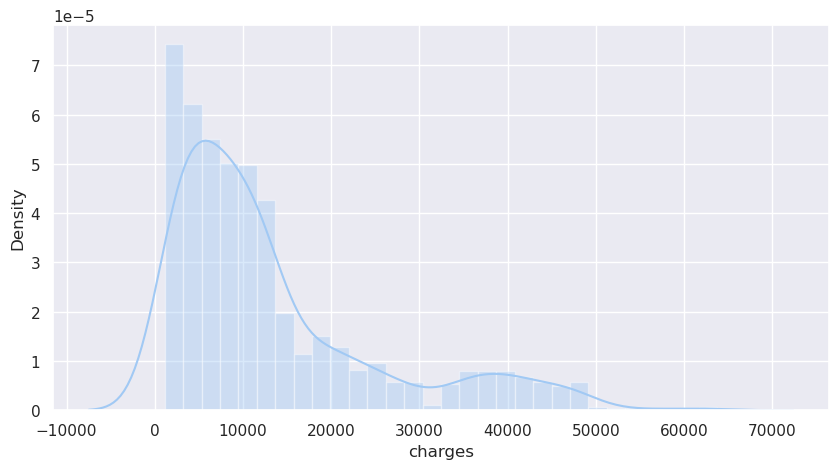

In [22]:
sns.set(style = "darkgrid", palette = "pastel", color_codes = True)

plt.figure(figsize = (10,5))
sns.distplot(df['charges'])
plt.show()

### 데이터셋의 결측치 개수 확인 (z-score 활용, threshold: 3)

In [23]:
def out_zscore(data):
    global outliers, zscore # 변수 정의
    outliers = [] 
    zscore = []
    threshold = 3 # z-score threshold 정의

    mean = np.mean(data) # 데이터의 평균 계산
    std = np.std(data) # 데이터의 표준편차 계산

    for i in data:
        z_score = (i - mean)/std # index 별 z-score 계산
        zscore.append(z_score)
        
        if np.abs(z_score) > threshold: # threshold 기준으로 outlier 값 확인 
            outliers.append(i)
    return print("Total number of outliers are", len(outliers))

In [24]:
# 7개의 결측치 존재 
out_zscore(df.charges)

Total number of outliers are 7


### z-score를 기준으로 outlier 예상 위치 표시 

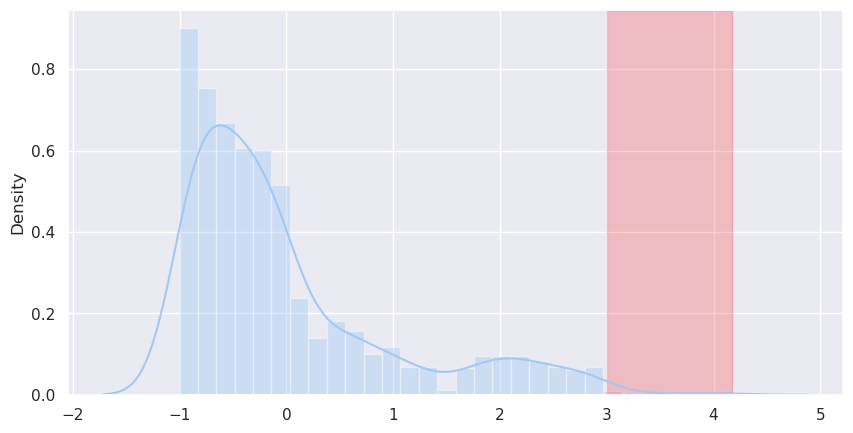

In [25]:
plt.figure(figsize = (10,5))
sns.distplot(zscore) # z-socre distribution plot 시각화 
plt.axvspan(xmin = 3, xmax = max(zscore), alpha = 0.2, color = 'red') # 이상치 위치 표시
plt.show()

In [26]:
# multivariate outlier
# DBSCAN 모델링 

X = df[['age','bmi']].values # features

db = DBSCAN(eps = 3.0, min_samples = 10).fit(X) # 데이터를 dbscan 모델에 적합 
labels = db.labels_ # dbscan에서 임의로 clustering한 label 저장 

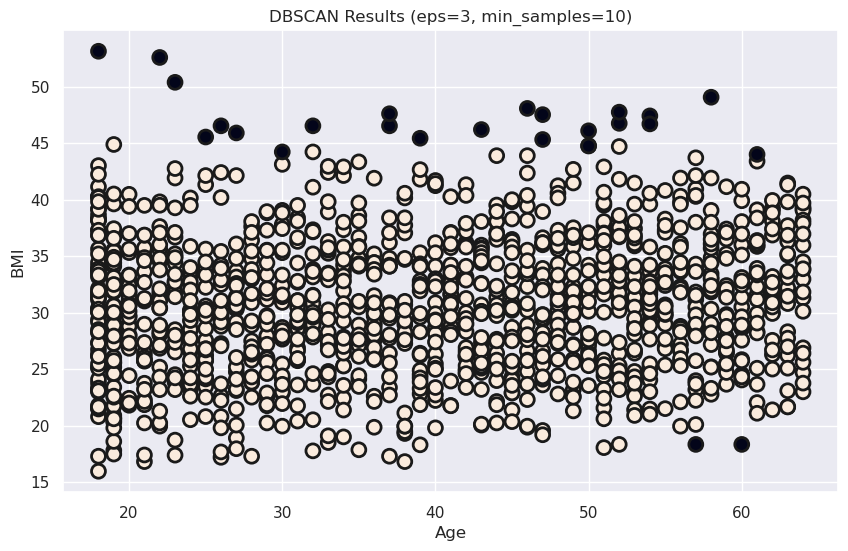

In [27]:
# Visualizing DBSCAN
fig = plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=db.labels_, s=100, edgecolor="k", linewidth=2)

plt.title("DBSCAN Results (eps=3, min_samples=10)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [28]:
# Number of Clusters
labels=db.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 26


# EOD